In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import utils
import time

In [2]:
df = pd.read_excel("/Users/saurabh/Documents/PythonData/table_8_offenses_known_to_law_enforcement_california_by_city_2013.xls", encoding = "ISO-8859-1", skiprows=4)

In [3]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
0,Adelanto,31165.0,198.0,2.0,NaN,15.0,52.0,129.0,886.0,381.0,372.0,133.0,17.0
1,Agoura Hills,20762.0,19.0,0.0,NaN,2.0,10.0,7.0,306.0,109.0,185.0,12.0,7.0
2,Alameda,76206.0,158.0,0.0,NaN,10.0,85.0,63.0,1902.0,287.0,1285.0,330.0,17.0
3,Albany,19104.0,29.0,0.0,NaN,1.0,24.0,4.0,557.0,94.0,388.0,75.0,7.0
4,Alhambra,84710.0,163.0,1.0,NaN,9.0,81.0,72.0,1774.0,344.0,1196.0,234.0,7.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 13 columns):
City                                    464 non-null object
Population                              462 non-null float64
Violent
crime                           462 non-null float64
Murder and
nonnegligent
manslaughter    462 non-null float64
Rape
(revised
definition)1              0 non-null float64
Rape
(legacy
definition)2               462 non-null float64
Robbery                                 462 non-null float64
Aggravated
assault                      462 non-null float64
Property
crime                          462 non-null float64
Burglary                                462 non-null float64
Larceny-
theft                          462 non-null float64
Motor
vehicle
theft                     462 non-null float64
Arson                                   462 non-null float64
dtypes: float64(12), object(1)
memory usage: 47.2+ KB


In [5]:
df.fillna(df.mean(),inplace=True)

In [6]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
0,Adelanto,31165.0,198.0,2.0,NaN,15.0,52.0,129.0,886.0,381.0,372.0,133.0,17.0
1,Agoura Hills,20762.0,19.0,0.0,NaN,2.0,10.0,7.0,306.0,109.0,185.0,12.0,7.0
2,Alameda,76206.0,158.0,0.0,NaN,10.0,85.0,63.0,1902.0,287.0,1285.0,330.0,17.0
3,Albany,19104.0,29.0,0.0,NaN,1.0,24.0,4.0,557.0,94.0,388.0,75.0,7.0
4,Alhambra,84710.0,163.0,1.0,NaN,9.0,81.0,72.0,1774.0,344.0,1196.0,234.0,7.0


In [7]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson'],
      dtype='object')

In [8]:
df = df.drop(['Rape\n(revised\ndefinition)1'], axis=1)

In [9]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
0,Adelanto,31165.0,198.0,2.0,15.0,52.0,129.0,886.0,381.0,372.0,133.0,17.0
1,Agoura Hills,20762.0,19.0,0.0,2.0,10.0,7.0,306.0,109.0,185.0,12.0,7.0
2,Alameda,76206.0,158.0,0.0,10.0,85.0,63.0,1902.0,287.0,1285.0,330.0,17.0
3,Albany,19104.0,29.0,0.0,1.0,24.0,4.0,557.0,94.0,388.0,75.0,7.0
4,Alhambra,84710.0,163.0,1.0,9.0,81.0,72.0,1774.0,344.0,1196.0,234.0,7.0


In [10]:
#df['Population'] = df['Population'].astype(np.int64)

In [11]:
df.loc[df['Murder and\nnonnegligent\nmanslaughter']>0,'Murder']=1
df.loc[df['Murder and\nnonnegligent\nmanslaughter']==0,'Murder']=0

In [12]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson,Murder
0,Adelanto,31165.0,198.0,2.0,15.0,52.0,129.0,886.0,381.0,372.0,133.0,17.0,1.0
1,Agoura Hills,20762.0,19.0,0.0,2.0,10.0,7.0,306.0,109.0,185.0,12.0,7.0,0.0
2,Alameda,76206.0,158.0,0.0,10.0,85.0,63.0,1902.0,287.0,1285.0,330.0,17.0,0.0
3,Albany,19104.0,29.0,0.0,1.0,24.0,4.0,557.0,94.0,388.0,75.0,7.0,0.0
4,Alhambra,84710.0,163.0,1.0,9.0,81.0,72.0,1774.0,344.0,1196.0,234.0,7.0,1.0


In [20]:
from sklearn.model_selection import train_test_split
X = df.drop(['Murder','City'],1)
y = df['Murder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [21]:
X_train.head()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
351,65295.0,56.0,0.0,3.0,21.0,32.0,844.0,209.0,582.0,53.0,2.0
332,102520.0,434.0,4.0,19.0,192.0,219.0,2717.0,798.0,1148.0,771.0,20.0
247,12288.0,65.0,1.0,2.0,18.0,44.0,274.0,88.0,58.0,128.0,12.0
97,24091.0,111.0,0.0,4.0,38.0,69.0,320.0,64.0,174.0,82.0,1.0
284,172525.0,634.0,9.0,41.0,182.0,402.0,4494.0,677.0,3417.0,400.0,24.0


In [22]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

start_time = time.time()
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X_train, y_train)
print('{0}s seconds'.format(time.time() - start_time))

0.008709907531738281s seconds


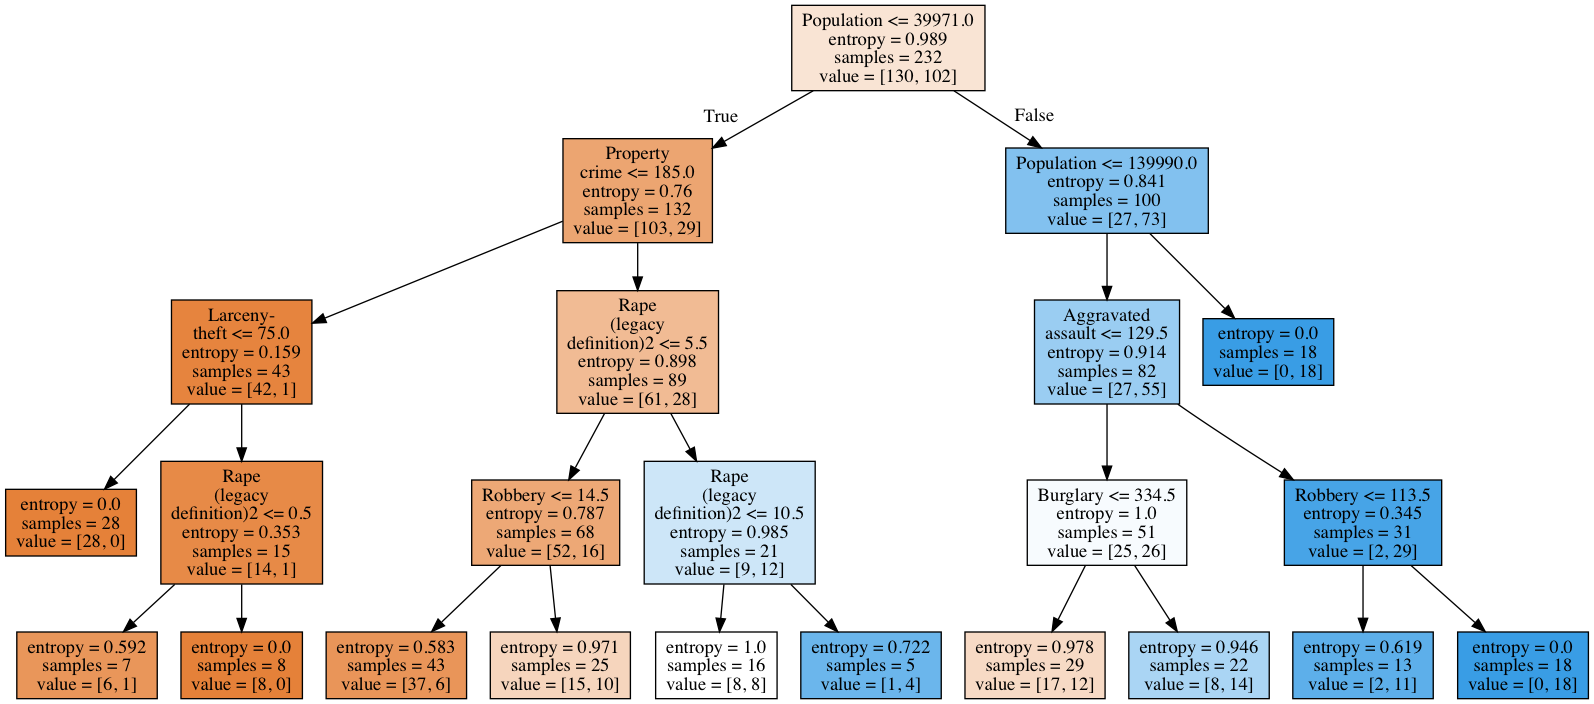

In [24]:
# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [23]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

start_time = time.time()
rfc = ensemble.RandomForestClassifier()
print(cross_val_score(rfc, X_train, y_train, cv=4))
print('{0}s seconds'.format(time.time() - start_time))

[1.         1.         0.98245614 1.        ]
0.06429600715637207s seconds
